In [1]:
from skimage import io, img_as_float, img_as_ubyte
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
from scipy import signal
from math import log10
import matplotlib.pyplot as plt
import numpy as np
import json
import math

In [2]:
def MED(actual, predicted):
    errors = np.abs(actual - predicted)
    return np.median(errors)

def NMED(actual, predicted):
    errors = np.abs(actual - predicted)
    return np.median(errors) / (np.max(actual) - np.min(actual))

def MRED(actual, predicted):
    actual = actual + 0.0001 # prevent divided by 0 error

    abs_error = np.abs(predicted - actual)
    # Calculate the relative error
    rel_error = abs_error / actual
    
    # Calculate the mean relative error
    mean_rel_error = np.mean(rel_error)
    
    return mean_rel_error

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
10.203282906565812
21863.88838427677
56007.07302064604
59626.135516771035
122942.52518755037
231492.3965992932
29117.483337466674
580494.4994574989
10.203282906565812
21863.88838427677
56007.07302064604


/home/fsengi/Documents/master/epc/epcExercise/.venv/lib/python3.10/site-packages/skimage/metrics/_structural_similarity.py:251: RuntimeWarning: invalid value encountered in divide
  S = (A1 * A2) / D
/tmp/ipykernel_299215/485137683.py:59: RuntimeWarning: divide by zero encountered in scalar divide
  loadedDict[approxAlgo]["psnr"][indexBit] = round(10 * log10(pic_list[0].max()**2 / mse),2)
/tmp/ipykernel_299215/3573020273.py:13: RuntimeWarning: invalid value encountered in divide
  rel_error = abs_error / actual
/tmp/ipykernel_299215/3573020273.py:13: RuntimeWarning: divide by zero encountered in divide
  rel_error = abs_error / actual


59626.135516771035
122942.52518755037
231492.3965992932
29117.483337466674
580494.4994574989
10.203282906565812
59.536037572075145
324.01815053630105
1350.6036797073593
4767.609631719263
21229.138616777233
69714.13018476038
372446.95311240625
10.203282906565812
39.93680637361275
174.94021638043276
751.5336195672392
2321.1232407464813
11477.388601277202
20521.164594829188
155306.04158658316
67196.28685907372
124040.00568851137
168252.75192200384
166505.11673073345
177850.04177258356
302444.6259377519
179672.46845743692
599707.7569440139
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
11460.323997147994
3780.3620652241307
2790.0789726579455
3070.2295709591417
8218.114250728502
24557.832646165294
52083.49251348503
213229.77988405977
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
10.203282906565812
43.724455948911896
208.89539029078057
916.3819052638105
3478.9120063240125
14841.808652117305
34263.51117552235
246383.16744683488
67196.28685907372
124040.00568851137
168252.75192200384
166505

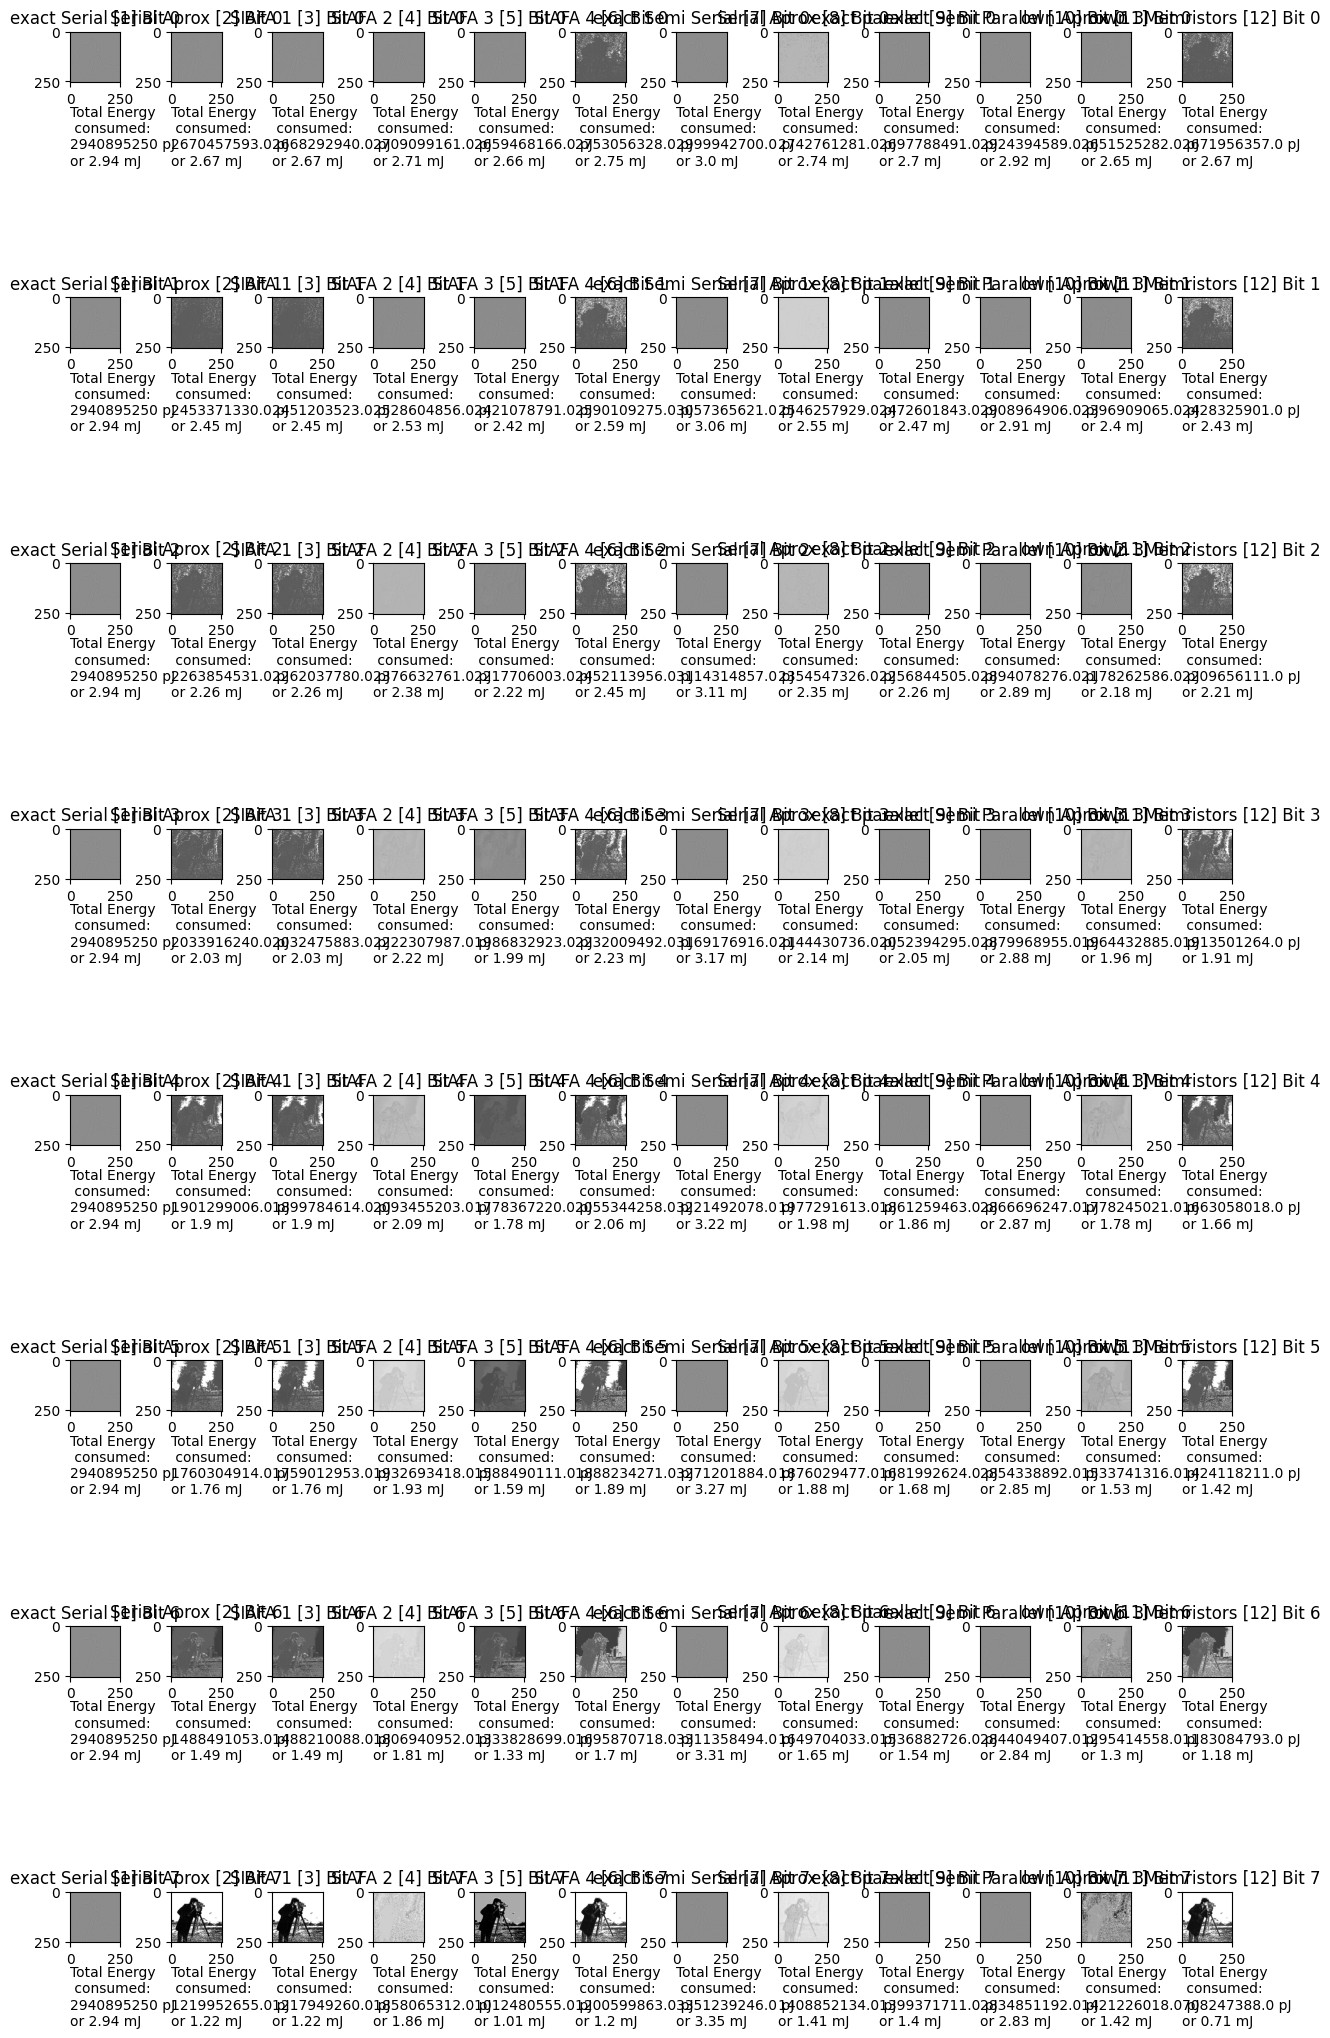

In [3]:
algo_list = ["Serial Aprox [2]","exact Serial [1]", "SIAFA 1 [3]","SIAFA 2 [4]","SIAFA 3 [5]","SIAFA 4 [6]","exact Semi Serial [7]","Serial Aprox [8]", "exact parallel [9]","exact Semi Parallel [10]","own Aprox [11]", "own 3Memristors [12]"]

parsed_data = {}
rows = 8
coll = len(algo_list)
bit_list = range(0,rows)

empty_list = [0]*rows

kernelname_list = []
kernelname_list.append("blurring")
kernelname_list.append("edge_Detection")

for i, name in enumerate(algo_list):
    parsed_data[name] = {"ssi": empty_list, "psnr": empty_list, "energy_con": empty_list, "med": empty_list, "nmed": empty_list, "mred": empty_list}

# load data from jsonfile 
with open('data.json', 'w') as json_file:
    json.dump(parsed_data, json_file, indent=4)

# Load the data from the JSON file into a dictionary
with open('data.json', 'r') as json_file:
    loadedDict = json.load(json_file)


fig, axs = plt.subplots(rows, coll, figsize=(15, 5))  # 5 rows, 1 column
plt.subplots_adjust(left=0.125, bottom=6, right=0.9, top=10, wspace=1, hspace=0.9)

folder = 'data_edge Detection'
#blurring
# loop throw all Bitpositions 
for indexAlgo, approxAlgo in enumerate(algo_list):
    pic_list = []
    pic_list.append(np.load(f"{folder}/outputimage_exact Serial [1]_2.npy"))
    energy_list = []
    # loop throw all Algorithm
    for indexBit, approxBit in enumerate(bit_list):
        # show picture in subplot

        with open(f'{folder}/{approxAlgo}_{indexBit}.json', 'r') as json_file:
            energy_list.append(json.load(json_file))
        
        pic_list.append(np.load(f"{folder}/outputimage_{approxAlgo}_{indexBit}.npy"))

        # print(pic_list[0])
        
        axs[indexBit,indexAlgo].imshow(pic_list[-1], cmap = "gray")
        # Add an annotation to the subplot
        axs[indexBit,indexAlgo].annotate(f"\nTotal Energy\n consumed: \n{round(energy_list[indexBit],0)} pJ \nor {round(energy_list[indexBit]/10**9,2)} mJ", (0,0), (0,-5),xycoords='axes fraction', textcoords='offset points', va='top')
    
        axs[indexBit,indexAlgo].set_title(f"{approxAlgo} Bit {approxBit}")
       
        try:
            # data_range = pic_list[-1].max() - pic_list[-1].min()  
            # mse = mse(pic_list[0], pic_list[-1])    
            # print(mse) 
            # load results to dictionary
            # print(pic_list[0].max())
            loadedDict[approxAlgo]["ssi"][indexBit] = ssim(pic_list[0], pic_list[-1], data_range=255)
            loadedDict[approxAlgo]["psnr"][indexBit] = round(psnr(pic_list[0], pic_list[-1], data_range=255))
            # loadedDict[approxAlgo]["psnr"][indexBit] = round(10 * log10(pic_list[0].max()**2 / mse),2)
            loadedDict[approxAlgo]["energy_con"][indexBit] = energy_list[-1]/10**9
            loadedDict[approxAlgo]["med"][indexBit] = MED(pic_list[0], pic_list[-1])
            loadedDict[approxAlgo]["nmed"][indexBit] = NMED(pic_list[0], pic_list[-1])
            loadedDict[approxAlgo]["mred"][indexBit] = MRED(pic_list[0], pic_list[-1])
            
        except Exception as e:
            print(f'Error plot at: indexBit {indexBit} Algo {approxAlgo} - {e}')
        else:
            continue
# Show the plot
plt.show()


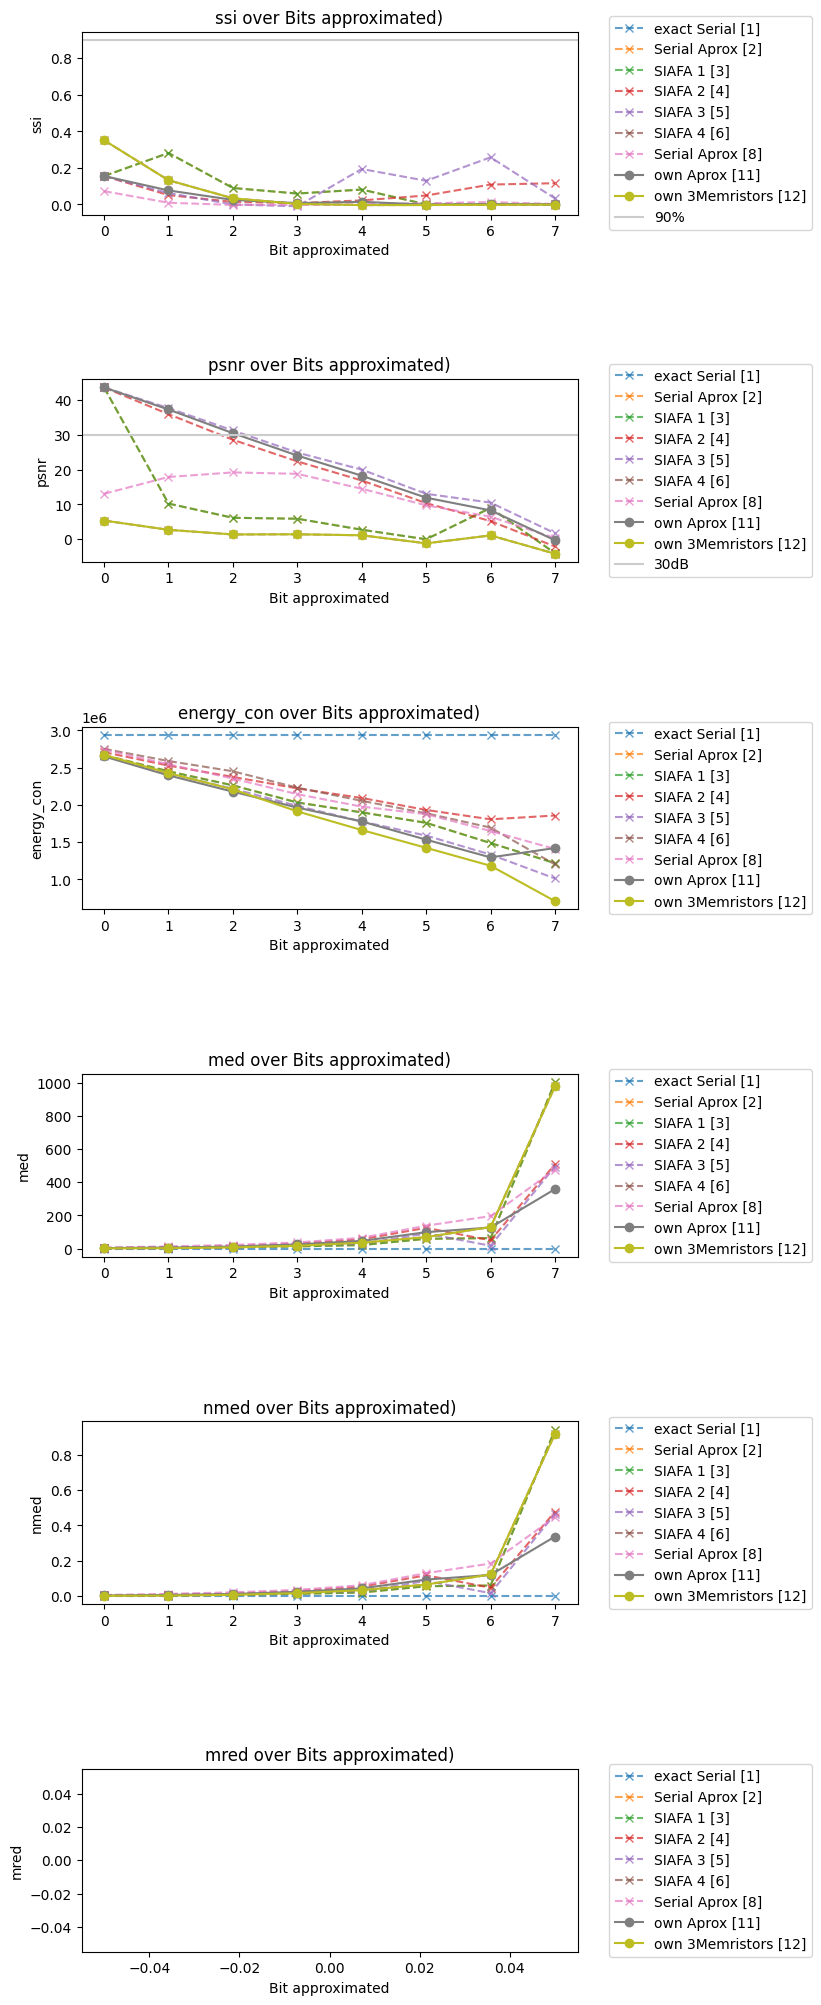

In [4]:
#error metrics list 
algo_list = ["exact Serial [1]","Serial Aprox [2]", "SIAFA 1 [3]","SIAFA 2 [4]","SIAFA 3 [5]","SIAFA 4 [6]","Serial Aprox [8]","own Aprox [11]", "own 3Memristors [12]"]
metrics_list = ["ssi", "psnr", "energy_con", "med", "nmed", "mred"]
rows = len(metrics_list)
coll = 1

fig, axs = plt.subplots(rows, coll )
plt.subplots_adjust(left=0.125, bottom=6, right=0.9, top=10, wspace=1, hspace=0.9)

#blurring
# loop throw all Bitpositions 
for indexMetric, metric in enumerate(metrics_list):

    for indexalgo, algo in enumerate(algo_list):
        if 'own' in algo:
            axs[indexMetric].plot(loadedDict[algo][metric], "o-", label=algo)
        else:
            if metric == 'energy_con' or 'exact' not in algo:
                axs[indexMetric].plot(loadedDict[algo][metric], "x--", label=algo, alpha=0.7)

    if "ssi" in metric:
        axs[indexMetric].axhline(y=0.9, color='0.8', linestyle='-', label='90%')
    if "psnr" in metric:
        axs[indexMetric].axhline(y=30, color='0.8', linestyle='-', label='30dB')

    axs[indexMetric].set_title(f"{metric} over Bits approximated)")
    axs[indexMetric].set_xlabel("Bit approximated")
    axs[indexMetric].set_ylabel(f'{metric}')
    # axs[indexMetric].legend()
    axs[indexMetric].legend(bbox_to_anchor=(1.05, 0.5), loc='center left')

# plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()